In [1]:
from google_play_scraper import app
from google_play_scraper import Sort, reviews
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import csv

# Getting App IDs

In [8]:
def getSimilarApps(appId_file,appId,count):
    
    appIdList = []
    
    if(count > 0):
        app_json = app(appId, lang='en', country='IE')
        
        #data
        similarApps = app_json['similarApps']
        score = app_json['score']
        price = app_json['price']
        adSupported = app_json['adSupported']
        offersIAP = app_json['offersIAP']
        inAppProductPrice = app_json['inAppProductPrice']
        genre = app_json['genre']
        
        #adding app data to list
        newApp = [str(appId), 
                      score, 
                      price, 
                      adSupported, 
                      offersIAP, 
                      str(inAppProductPrice),
                     str(genre)]
        appIdList = [newApp]
        
        #write
        with open(appId_file, 'a+', newline='', encoding='utf-8') as f:
            writer = csv.writer(f)
            writer.writerows(appIdList)
                    
        #recursion
        if(similarApps is not None):
            for x in similarApps:
                nextApp = getSimilarApps(appId_file,x,count-1)
                appIdList.extend(nextApp)
                
    return appIdList
    

# Seed apps

In [4]:
#Seed apps are the beginning app for the crawler
#more seed apps, more app ids
appId_files_list = [['appIds/appIds_games.csv','com.GameLemo.ArmSimulator'],
                    ['appIds/appIds_entertainment.csv','com.netflix.mediaclient'],
                    ['appIds/appIds_healthFitness.csv','com.myfitnesspal.android'],
                    ['appIds/appIds_finance.csv','com.revolut.revolut'],
                   ['appIds/appIds_social.csv','com.twitter.android'],
                   ['appIds/appIds_shopping.csv','com.amazon.mShop.android.shopping'],
                   ['appIds/appIds_dating.csv','com.tinder'],
                   ['appIds/appIds_sports.csv','com.bskyb.sportnews'],
                   ['appIds/appIds_videoEditors.csv','org.videolan.vlc'],
                   ['appIds/appIds_weather.csv','com.weather.Weather'],
                   ['appIds/appIds_artDesign.csv','com.adsk.sketchbook'],
                   ['appIds/appIds_autoVehicles.csv','com.jvelimited.vehiclesmart'],
                   ['appIds/appIds_musicAudio.csv','com.spotify.music'],
                   ['appIds/appIds_travelLocal.csv','com.tripadvisor.tripadvisor'],
                   ['appIds/appIds_communication.csv','com.discord'],
                   ['appIds/appIds_houseHome.csv','it.immobiliare.android'],
                    ['appIds/appIds_FoodDrink.csv','com.deliveroo.orderapp'],
                    ['appIds/appIds_finance.csv','com.binance.dev'],
                   ['appIds/appIds_social.csv','live.bunch.group.video.chat.party.games'],
                   ['appIds/appIds_dating.csv','com.coffeemeetsbagel'],
                   ['appIds/appIds_sports.csv','com.girt.ebadism.mcf'],
                   ['appIds/appIds_videoEditors.csv','com.infomir.stalkertvfortv'],
                   ['appIds/appIds_lifestyle.csv','com.lgeha.nuts'],
                   ['appIds/appIds_artDesign.csv','com.dephotos.crello'],
                   ['appIds/appIds_autoVehicles.csv','com.autoscout24'],
                   ['appIds/appIds_communication.csv','com.cloudmosa.puffin'],
                   ['appIds/appIds_productivity.csv','com.veamstudios.siteauditpro'],
                   ['appIds/appIds_photography.csv','com.simplemobiletools.gallery.pro'],
                   ['appIds/appIds_newsMagazines.csv','com.devhd.feedly'],
                   ['appIds/appIds_tools.csv','com.appntox.vpnpro'],
                   ['appIds/appIds_business.csv','com.indeed.android.jobsearch'],
                    ['appIds/appIds_communication.csv','ch.protonmail.android'],
                    ['appIds/appIds_photography.csv','com.magicv.airbrush'],
                    ['appIds/appIds_videoEditors.csv','com.camerasideas.trimmer'],
                   ['appIds/appIds_finance.csv','com.grppl.android.shell.CMBlloydsTSB73'],
                   ['appIds/appIds_sports.csv','com.sofascore.results'],
                   ['appIds/appIds_productivity.csv','com.rhmsoft.edit.pro'],
                   ['appIds/appIds_travelLocal.csv','com.pinkfroot.planefinder'],
                   ['appIds/appIds_entertainment.csv','com.magicfluids'],
                   ['appIds/appIds_musicAudio.csv','com.imageline.FLM'],
                   ['appIds/appIds_newsMagazines.csv','flipboard.app'],
                   ['appIds/appIds_social.csv','com.clubhouse.app'],
                   ['appIds/appIds_lifestyle.csv','com.life360.android.safetymapd'],
                   ['appIds/appIds_shopping.csv','uk.co.next.android'],
                   ['appIds/appIds_weather.csv','aplicacionpago.tiempo'],
                    ['appIds/appIds_dating.csv','com.getpure.pure'],
                    ['appIds/appIds_artDesign.csv','io.opensea'],
                   ['appIds/appIds_healthFitness.csv','de.baliza.hifmco'],
                   ['appIds/appIds_FoodDrink.csv','com.app.tgtg'],
                   ['appIds/appIds_houseHome.csv','com.icandesignapp.all'],
                    ['appIds/appIds_autoVehicles.csv','cz.skodaauto.connect']]

In [9]:
#Scrape app id data
for i in range(len(appId_files_list)):
    getSimilarApps(appId_files_list[i][0],appId_files_list[i][1],5)

# Removing Duplicates from App ID lists

In [12]:
def removeDuplicatesAndCombine(appId_file,appId_files_list):
    
    appList=[]
    for index in range(len(appId_files_list)):
        #read files
        fileName = appId_files_list[index][0]
        with open(fileName, "r", encoding='utf-8') as f:
            reader = csv.reader(f, delimiter=",")
            for i, line in enumerate(reader):
                if(line not in appList):
                    appList.append(line)
        
    #combine into 1 file
    with open(appId_file, 'a+', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerows(appList)

In [13]:
removeDuplicatesAndCombine('appIds/appIds_all.csv',appId_files_list)

# Get Reviews

In [2]:
def scrapeReviews(appId_file, appIdList, amountOfReviews):
    
    appId = appIdList
    
    #check if the file exists
    if(os.path.exists(appId_file % appId) == False):
        
        app_reviews = reviews(
            appId, 
            lang='en', 
            country='IE', 
            sort=Sort.NEWEST, 
            count=amountOfReviews
        )

        #data collected
        for i in range(len(app_reviews[0])):
            data = [app_reviews[0][i]['reviewId'],
                    app_reviews[0][i]['userName'],
                    app_reviews[0][i]['content'],
                    app_reviews[0][i]['score'],
                    app_reviews[0][i]['thumbsUpCount'],
                    app_reviews[0][i]['reviewCreatedVersion'],
                    app_reviews[0][i]['at'],
                    app_reviews[0][i]['replyContent'],
                    app_reviews[0][i]['repliedAt']]

            with open(appId_file % appId, 'a+', newline='', encoding='utf-8') as f:
                writer = csv.writer(f)
                writer.writerow(data)

In [3]:
#read files
appIdsList=[]
with open('appIds/appIds_all.csv', "r", encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        appIdsList.append(line[0])

In [4]:
for i in range(3100,len(appIdsList),1):
    scrapeReviews('appReviews/appReviews_all_%s.csv', appIdsList[i],1000)

# Combine all reviews into 1 dataset

In [5]:
def combineDatasets(appId_file, appReview_file, output_file):
    
    #open app id file
    with open(appId_file, "r", encoding='utf-8') as f:
        reader = csv.reader(f, delimiter=",")
        for i, line in enumerate(reader):
            appId = line[0]
            
            #open review file
            if(os.path.exists(appReview_file % appId)):
                df = pd.read_csv(appReview_file % appId)
                
                for index, row in df.iterrows():
                    #make sure the first index is a review id 'gp:'
                    if(df.iloc[index][0].startswith("gp:")):
                        #write to file
                        with open(output_file, 'a+', newline='', encoding='utf-8') as f3:
                            writer = csv.writer(f3)
                            writer.writerow(line + df.iloc[index].values.flatten().tolist())


In [6]:
combineDatasets('appIds/appIds_all.csv', 'appReviews/appReviews_all_%s.csv', 'allAppReviews.csv')

# Loading Dataset into dataframe

In [2]:
data = []

with open('allAppReviews.csv', "r", encoding='utf-8') as f:
        reader = csv.reader(f, delimiter=",")
        for i, line in enumerate(reader):
            data.append(line)
            
df = pd.DataFrame(data, columns=['AppId',
                                 'AppScore',
                                 'Price',
                                 'AdSupported',
                                 'OffersIAP',
                                 'InAppProductPrice',
                                 'Genre',
                                 'ReviewId',
                                 'Username',
                                 'ReviewText',
                                 'Score',
                                 'ThumbsUpCount',
                                 'ReviewCreatedVersion',
                                 'Time',
                                 'ReplyContent',
                                 'RepliedAt'])
df = df.drop_duplicates()
df

,AppId,AppScore,Price,AdSupported,OffersIAP,InAppProductPrice,Genre,ReviewId,Username,ReviewText,Score,ThumbsUpCount,ReviewCreatedVersion,Time,ReplyContent,RepliedAt
0,com.indeed.android.jobsearch,4.6532035,0,True,False,None,Business,gp:AOqpTOFmCWceVoFZy8SeT12c-I66JbSj0Nf7-hnVE4B...,Malesha Hasan,Excellent app to use. No problems.,5,0,105.0,2022-04-09 18:23:54,nan,nan
1,com.indeed.android.jobsearch,4.6532035,0,True,False,None,Business,gp:AOqpTOE7iZydz6Vu-dbOYpLejv8suWqfV0x9dVhIg05...,Melanie Zokem,Stronger Good but slow,5,0,104.0,2022-04-09 18:16:21,nan,nan
2,com.indeed.android.jobsearch,4.6532035,0,True,False,None,Business,gp:AOqpTOEzc9TbIqE7koJWizuWQy-ot_uB_od_CBQ3Tai...,JOHN JACOB,Submitted many times,5,0,105.0,2022-04-09 18:07:13,nan,nan
3,com.indeed.android.jobsearch,4.6532035,0,True,False,None,Business,gp:AOqpTOGVxCF1GYL0LEbAeBPJ9tlmmKkcQ3NCdnWGQS_...,Tyson Ngoni Rungo,supper excellent,5,0,105.0,2022-04-09 17:09:00,nan,nan
4,com.indeed.android.jobsearch,4.6532035,0,True,False,None,Business,gp:AOqpTOHHfQ6upfUYcdvC3H2zqEiCCMsgvpUuQ7ipd4g...,Niyas Salim,Latest few updates are full of bugs. Even if i...,2,0,nan,2022-04-09 16:44:41,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190018,io.privado.android,0,0,,True,€7.99 - €59.99 per item,Tools,gp:AOqpTOG06DKTWMvO2U8ODjDt92Wf03_fHUdUxAedQQc...,Jared Rau,Work seamlessly with no issues so far,5,1,1.0.475,2020-10-27 19:23:39,Thank you very much for your 5-star review!!!\n\n,2021-07-29 21:49:44
2190019,io.privado.android,0,0,,True,€7.99 - €59.99 per item,Tools,gp:AOqpTOGYuY_jqjCaFEmdX59GSsHt5rYpAIiF_UEb8kf...,Thinus Groenewald,Working great on my Samsung S20+ Please make i...,5,4,1.0.475,2020-10-25 11:56:05,Would you be able to reach out to our support ...,2020-10-21 15:14:56
2190020,io.privado.android,0,0,,True,€7.99 - €59.99 per item,Tools,gp:AOqpTOEACtZZvy7nTxyIui19gZyfUnBL67xKvBCqpdg...,Matthew Joy,Working without issues for the last week,5,3,1.0.475,2020-10-21 18:03:11,Thank you very much for your 5-star review!!!\n\n,2021-07-29 21:49:47
2190021,io.privado.android,0,0,,True,€7.99 - €59.99 per item,Tools,gp:AOqpTOHEAldNSigg5KI7WIDSbo__VsLZh3kbBvnWzpf...,John Checker,Works good,5,1,nan,2020-10-19 13:19:06,Thank you very much for your 5-star review!,2021-07-29 21:50:17


# Dataset results

In [4]:
print(len(df), ' reviews in dataset')

2479592  reviews in dataset


In [5]:
reviews_in_genre = df['Genre'].value_counts()
reviews_in_genre

Tools                      202472
Photography                166709
Finance                    146041
Music & Audio              145351
Shopping                   141092
Communication              140227
Video Players & Editors    114470
Business                   101951
Social                      99855
Sports                      97406
Entertainment               94668
Productivity                91283
Travel & Local              84566
Weather                     82495
Lifestyle                   67773
Education                   65296
News & Magazines            64217
Health & Fitness            59081
Simulation                  57324
Food & Drink                55066
Dating                      52728
Art & Design                51934
Auto & Vehicles             33198
Board                       33109
Action                      32670
House & Home                23216
Arcade                      22878
Casual                      22804
Maps & Navigation           20753
Puzzle        

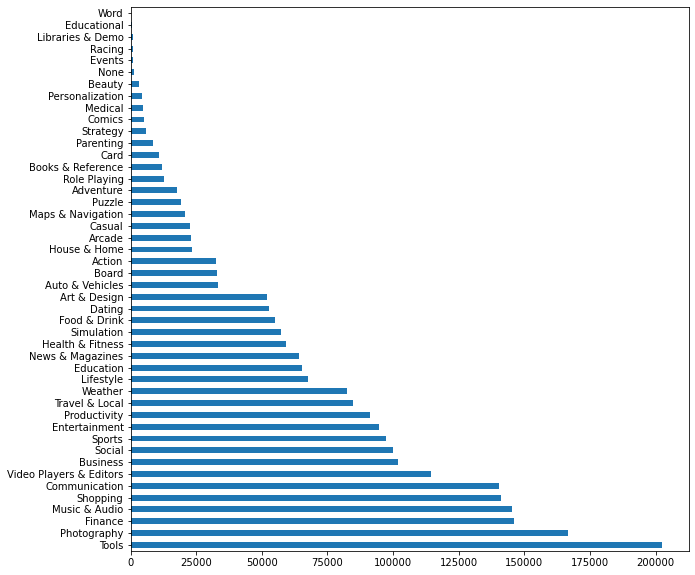

In [6]:
plt.rcParams["figure.figsize"] = (10, 10)
reviews_in_genre.plot.barh();

In [7]:
apps_in_genre = df.groupby('AppId')['Genre'].apply(lambda x: list(np.unique(x)))
apps_in_genre = pd.DataFrame(apps_in_genre.value_counts()).reset_index()
apps_in_genre = apps_in_genre.rename(columns={'Genre':'AppCount'})
apps_in_genre = apps_in_genre.rename(columns={'index':'Genre'})
apps_in_genre

,Genre,AppCount
0,[Tools],316
1,[Business],202
2,[Finance],196
3,[Photography],193
4,[Music & Audio],180
5,[Productivity],178
6,[Communication],173
7,[Shopping],150
8,[Sports],150
9,[Video Players & Editors],150


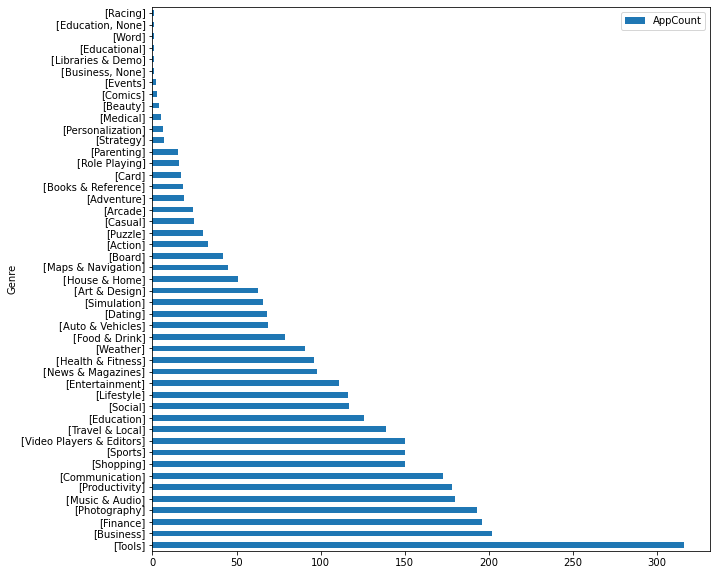

In [8]:
plt.rcParams["figure.figsize"] = (10, 10)
apps_in_genre.plot.barh(x='Genre', y='AppCount');

# Cleaning Data

In [9]:
#splitting InAppProductPrice into two separate columns
df[['InAppProductPrice Low','InAppProductPrice High']] = df['InAppProductPrice'].str.split(' - ', expand=True)
df = df.drop(columns=['InAppProductPrice'])

#converting columns from strings to float values
df['InAppProductPrice Low'] = df['InAppProductPrice Low'].str.replace('None', '0',regex=True)
df['InAppProductPrice High'] = df['InAppProductPrice High'].str.replace('None', '0',regex=True)

#remove not number characters
df['InAppProductPrice Low'] = df['InAppProductPrice Low'].str.replace(r'\D', '',regex=True)
df['InAppProductPrice High'] = df['InAppProductPrice High'].str.replace(r'\D', '',regex=True)

df['InAppProductPrice Low'] = df['InAppProductPrice Low'].astype(float)
df['InAppProductPrice High'] = df['InAppProductPrice High'].astype(float)

#the dot was removed so 1.49 became 149, this is why it is divided by 100, so it becomes 1.49 float
df['InAppProductPrice Low'] = df['InAppProductPrice Low']/100
df['InAppProductPrice High'] = df['InAppProductPrice High']/100

df['InAppProductPrice Low'] = df['InAppProductPrice Low'].fillna(0)
df['InAppProductPrice High'] = df['InAppProductPrice High'].fillna(0)

In [10]:
#converting reply content to ReceivedReply
df = df.drop(columns=['RepliedAt'])
conditions = [(df['ReplyContent'] == 'nan'),(df['ReplyContent'] != 'nan')]
values = ['False', 'True']
df['ReceivedReply'] = np.select(conditions, values)
df = df.drop(columns=['ReplyContent'])

In [11]:
#splitting genre into genre and sub genre (Games has a lot of sub genres)
df = df.rename(columns={'Genre':'SubGenre'})

In [12]:
#getting all app ids for games
#sports is a sub genre of games, but sports is also its own genre, so I need to distinguish between games and non games
gameAppIdsList=[]
with open('appIds/appIds_games.csv', "r", encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        gameAppIdsList.append(line[0])

In [13]:
#converting the subgenre into genre
#sport is its own genre but there is also a sport subgenre of games
conditions = [(df['SubGenre'].isin(['Action','Adventure','Arcade',
                                  'Board','Card','Casino','Casual',
                                  'Educational','Music','Puzzle',
                                  'Racing','Role Playing','Simulation',
                                  'Strategy','Trivia','Word'])),
              (df['AppId'].isin(gameAppIdsList))]
values = ['Games', 'Games']
df['Genre'] = np.select(conditions, values, default=df['SubGenre'])

In [14]:
#re-ordering columns
df = df[["AppId", "AppScore", "Price",
         'AdSupported','OffersIAP','InAppProductPrice Low',
         'InAppProductPrice High','Genre','SubGenre',
         'ReviewId','Username','ReviewText',
         'Score','ThumbsUpCount','ReviewCreatedVersion',
         'ReceivedReply','Time']]

In [15]:
#removing Genres due to a low number of apps
df = df[~df.Genre.isin(['Medical',
                        'Education',
                        'Events',
                        'Comics',
                        'Personalization',
                        'Libraries & Demo',
                        'Books & Reference',
                       'Parenting',
                       'Beauty',
                       'None'])]

In [16]:
df

,AppId,AppScore,Price,AdSupported,OffersIAP,InAppProductPrice Low,InAppProductPrice High,Genre,SubGenre,ReviewId,Username,ReviewText,Score,ThumbsUpCount,ReviewCreatedVersion,ReceivedReply,Time
0,com.indeed.android.jobsearch,4.6532035,0,True,False,0.00,0.00,Business,Business,gp:AOqpTOFmCWceVoFZy8SeT12c-I66JbSj0Nf7-hnVE4B...,Malesha Hasan,Excellent app to use. No problems.,5,0,105.0,False,2022-04-09 18:23:54
1,com.indeed.android.jobsearch,4.6532035,0,True,False,0.00,0.00,Business,Business,gp:AOqpTOE7iZydz6Vu-dbOYpLejv8suWqfV0x9dVhIg05...,Melanie Zokem,Stronger Good but slow,5,0,104.0,False,2022-04-09 18:16:21
2,com.indeed.android.jobsearch,4.6532035,0,True,False,0.00,0.00,Business,Business,gp:AOqpTOEzc9TbIqE7koJWizuWQy-ot_uB_od_CBQ3Tai...,JOHN JACOB,Submitted many times,5,0,105.0,False,2022-04-09 18:07:13
3,com.indeed.android.jobsearch,4.6532035,0,True,False,0.00,0.00,Business,Business,gp:AOqpTOGVxCF1GYL0LEbAeBPJ9tlmmKkcQ3NCdnWGQS_...,Tyson Ngoni Rungo,supper excellent,5,0,105.0,False,2022-04-09 17:09:00
4,com.indeed.android.jobsearch,4.6532035,0,True,False,0.00,0.00,Business,Business,gp:AOqpTOHHfQ6upfUYcdvC3H2zqEiCCMsgvpUuQ7ipd4g...,Niyas Salim,Latest few updates are full of bugs. Even if i...,2,0,nan,False,2022-04-09 16:44:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190018,io.privado.android,0,0,,True,7.99,59.99,Tools,Tools,gp:AOqpTOG06DKTWMvO2U8ODjDt92Wf03_fHUdUxAedQQc...,Jared Rau,Work seamlessly with no issues so far,5,1,1.0.475,True,2020-10-27 19:23:39
2190019,io.privado.android,0,0,,True,7.99,59.99,Tools,Tools,gp:AOqpTOGYuY_jqjCaFEmdX59GSsHt5rYpAIiF_UEb8kf...,Thinus Groenewald,Working great on my Samsung S20+ Please make i...,5,4,1.0.475,True,2020-10-25 11:56:05
2190020,io.privado.android,0,0,,True,7.99,59.99,Tools,Tools,gp:AOqpTOEACtZZvy7nTxyIui19gZyfUnBL67xKvBCqpdg...,Matthew Joy,Working without issues for the last week,5,3,1.0.475,True,2020-10-21 18:03:11
2190021,io.privado.android,0,0,,True,7.99,59.99,Tools,Tools,gp:AOqpTOHEAldNSigg5KI7WIDSbo__VsLZh3kbBvnWzpf...,John Checker,Works good,5,1,nan,True,2020-10-19 13:19:06


In [17]:
apps_in_genre = df.groupby('AppId')['Genre'].apply(lambda x: list(np.unique(x)))
apps_in_genre = pd.DataFrame(apps_in_genre.value_counts()).reset_index()
apps_in_genre = apps_in_genre.rename(columns={'Genre':'AppCount'})
apps_in_genre = apps_in_genre.rename(columns={'index':'Genre'})
apps_in_genre

,Genre,AppCount
0,[Tools],316
1,[Games],291
2,[Business],203
3,[Finance],196
4,[Photography],193
5,[Music & Audio],180
6,[Productivity],178
7,[Communication],173
8,[Shopping],150
9,[Video Players & Editors],150


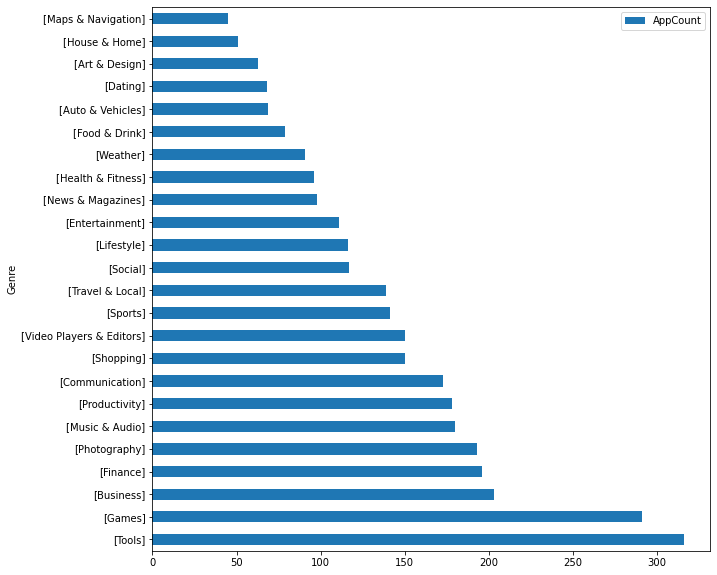

In [18]:
plt.rcParams["figure.figsize"] = (10, 10)
apps_in_genre.plot.barh(x='Genre', y='AppCount');

In [19]:
print(len(df), ' reviews in dataset')

2373038  reviews in dataset


# Pickle

In [20]:
df.to_pickle('appReviews_dataset_final.pkl')

In [21]:
df = pd.read_pickle('appReviews_dataset_final.pkl')

In [22]:
df

,AppId,AppScore,Price,AdSupported,OffersIAP,InAppProductPrice Low,InAppProductPrice High,Genre,SubGenre,ReviewId,Username,ReviewText,Score,ThumbsUpCount,ReviewCreatedVersion,ReceivedReply,Time
0,com.indeed.android.jobsearch,4.6532035,0,True,False,0.00,0.00,Business,Business,gp:AOqpTOFmCWceVoFZy8SeT12c-I66JbSj0Nf7-hnVE4B...,Malesha Hasan,Excellent app to use. No problems.,5,0,105.0,False,2022-04-09 18:23:54
1,com.indeed.android.jobsearch,4.6532035,0,True,False,0.00,0.00,Business,Business,gp:AOqpTOE7iZydz6Vu-dbOYpLejv8suWqfV0x9dVhIg05...,Melanie Zokem,Stronger Good but slow,5,0,104.0,False,2022-04-09 18:16:21
2,com.indeed.android.jobsearch,4.6532035,0,True,False,0.00,0.00,Business,Business,gp:AOqpTOEzc9TbIqE7koJWizuWQy-ot_uB_od_CBQ3Tai...,JOHN JACOB,Submitted many times,5,0,105.0,False,2022-04-09 18:07:13
3,com.indeed.android.jobsearch,4.6532035,0,True,False,0.00,0.00,Business,Business,gp:AOqpTOGVxCF1GYL0LEbAeBPJ9tlmmKkcQ3NCdnWGQS_...,Tyson Ngoni Rungo,supper excellent,5,0,105.0,False,2022-04-09 17:09:00
4,com.indeed.android.jobsearch,4.6532035,0,True,False,0.00,0.00,Business,Business,gp:AOqpTOHHfQ6upfUYcdvC3H2zqEiCCMsgvpUuQ7ipd4g...,Niyas Salim,Latest few updates are full of bugs. Even if i...,2,0,nan,False,2022-04-09 16:44:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190018,io.privado.android,0,0,,True,7.99,59.99,Tools,Tools,gp:AOqpTOG06DKTWMvO2U8ODjDt92Wf03_fHUdUxAedQQc...,Jared Rau,Work seamlessly with no issues so far,5,1,1.0.475,True,2020-10-27 19:23:39
2190019,io.privado.android,0,0,,True,7.99,59.99,Tools,Tools,gp:AOqpTOGYuY_jqjCaFEmdX59GSsHt5rYpAIiF_UEb8kf...,Thinus Groenewald,Working great on my Samsung S20+ Please make i...,5,4,1.0.475,True,2020-10-25 11:56:05
2190020,io.privado.android,0,0,,True,7.99,59.99,Tools,Tools,gp:AOqpTOEACtZZvy7nTxyIui19gZyfUnBL67xKvBCqpdg...,Matthew Joy,Working without issues for the last week,5,3,1.0.475,True,2020-10-21 18:03:11
2190021,io.privado.android,0,0,,True,7.99,59.99,Tools,Tools,gp:AOqpTOHEAldNSigg5KI7WIDSbo__VsLZh3kbBvnWzpf...,John Checker,Works good,5,1,nan,True,2020-10-19 13:19:06
